PROJECT TITLE:
An Analysis of Police Officer Stop Data

TEAM MEMBERS:
J.D. Strode
Vaidehee Shah
Octavio Origel
Peter Sparks
Melissa Mongrella


PROJECT DESCRIPTION/OUTLINE:
Our project is analyzing the The Stanford Open Project's Chicago dataset. 
We have chosen four questions from the dataset to further understand the nuances of traffic stops in the city.
    

RESEARCH QUESTIONS TO ANSWER:

1) How does the race and gender of the police officer affect the race and gender of the person getting stopped?
2) What area of Chicago do the most stops occur?
3) What are the most common time points for a stop to occur?
4) Was a citation issued?
5) What are the general demographics of people who get pulled over?

DATASETS TO BE USED:
We will be using the Stanford Opening Policing Project (https://openpolicing.stanford.edu/)

ROUGH BREAKDOWN OF TASKS:
J.D. Strode - Will look at demographic relationships (Question 1)
Vaidehee Shah - Will look at the most common time points for a stop to occur (Question 3)
Octavio Origel - Will examine if age influences the occurrence of citations or arrests 
Peter Sparks - Will look at location data
Melissa Mongrella - Will look at the general demographics of people who get pulled over

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import seaborn as sns
import scipy.stats as stats
# Import API key
# from api_key import g_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

In [2]:
# File to Load (Remember to Change These)
crime_data = "crime_data/chicagodata.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(crime_data, encoding="utf-8")

C:\Users\jdstr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,officer_id_hash,...,officer_race,officer_sex,officer_years_of_service,type,violation,arrest_made,citation_issued,outcome,raw_race,raw_driver_race
0,1,2012-01-06,09:00:00,700 LINCOLN W,NaN,NaN,23.0,black,male,a6d791f976,...,white,male,17.0,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,BLACK,NaN
1,2,2012-01-01,00:00:00,NaN,NaN,NaN,23.0,hispanic,male,81da9fab7e,...,white,male,2.0,vehicular,DRIVING/NEVER ISSUED LICENSE,True,NaN,arrest,HISPANIC,NaN
2,3,2012-01-01,01:00:00,0 NORTHWEST HWY & HILLSIDE RD S,NaN,NaN,38.0,white,female,NaN,...,NaN,NaN,NaN,vehicular,DRIVING ON SUSPENDED LICENSE,True,NaN,arrest,WHITE,NaN
3,4,2012-01-01,01:00:00,108 LAMON AVE N,NaN,NaN,35.0,black,male,048359e7c8,...,black,male,8.0,vehicular,IVC - FAIL TO STOP/SIGNAL CROSSWALK,True,NaN,arrest,BLACK,NaN
4,5,2012-01-01,01:00:00,3451 177TH ST W,NaN,NaN,20.0,black,male,NaN,...,NaN,NaN,NaN,vehicular,IVC - DRIVING 15-20 MPH ABOVE SPEED LIMIT,True,NaN,arrest,BLACK,NaN


In [5]:
df.count()

raw_row_number              846456
date                        846456
time                        846456
location                    775414
lat                         641014
lng                         641014
subject_age                 212223
subject_race                224139
subject_sex                 846121
officer_id_hash             152584
officer_age                  60063
officer_race                786791
officer_sex                 786791
officer_years_of_service    784276
type                        846455
violation                   846455
arrest_made                 212249
citation_issued             639944
outcome                     846456
raw_race                    212249
raw_driver_race              11906
dtype: int64

In [6]:
list(df.columns)

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'officer_age',
 'officer_race',
 'officer_sex',
 'officer_years_of_service',
 'type',
 'violation',
 'arrest_made',
 'citation_issued',
 'outcome',
 'raw_race',
 'raw_driver_race']

In [7]:
demo_df = df[['subject_sex',
 'subject_race','officer_sex',
 'officer_race',
        ]]
demo_df.head()

,subject_sex,subject_race,officer_sex,officer_race
0,male,black,male,white
1,male,hispanic,male,white
2,female,white,NaN,NaN
3,male,black,male,black
4,male,black,NaN,NaN


In [8]:
demo_df.count()

subject_sex     846121
subject_race    224139
officer_sex     786791
officer_race    786791
dtype: int64

In [9]:
demo_df = demo_df.dropna()
demo_df.count()

subject_sex     164434
subject_race    164434
officer_sex     164434
officer_race    164434
dtype: int64

Demographics Analysis

In [10]:
#correlation between subject race & officer race

In [11]:
groupbyrace = demo_df.groupby(["subject_race"]).count()
groupbyrace = groupbyrace['officer_race']
groupbyrace

subject_race
asian/pacific islander     1780
black                     76035
hispanic                  54554
other                       143
unknown                    1139
white                     30783
Name: officer_race, dtype: int64

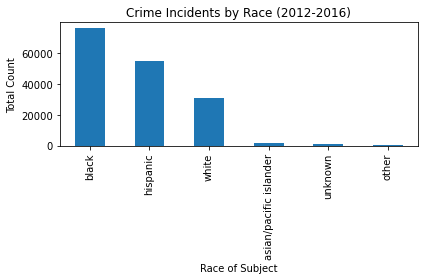

In [142]:
groupbyrace = groupbyrace.sort_values(ascending=False)

# Create a bar chart based off of the group series from before
racecounts = groupbyrace.plot(kind='bar')

# Set the xlabel and ylabel using class methods
racecounts.set_xlabel("Race of Subject")
racecounts.set_ylabel("Total Count")
racecounts.set_title("Crime Incidents by Race (2012-2016)")

#show bar chart
plt.tight_layout()
plt.savefig("images/Bar_Crime_by_Race.png")
plt.show()

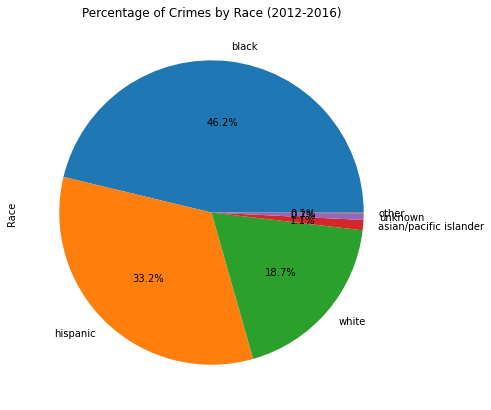

In [141]:
#group clean_df by race
groupbyrace.value_counts()

#set color formatting
colors=["blue", "orange"]

#Create the pie based upon the values above
groupbyrace.plot(kind="pie",autopct="%1.1f%%", figsize=(7,7))

plt.title("Percentage of Crimes by Race (2012-2016)")
plt.ylabel("Race")
plt.savefig("images/Pie_Crime_by_Race.png")

In [14]:
demo_df.head()
demo_df.count()

subject_sex     164434
subject_race    164434
officer_sex     164434
officer_race    164434
dtype: int64

In [140]:
groupbysubjectrace = demo_df.groupby(["subject_race"])
groupbysubjectrace['officer_race'].count()
racevsrace = groupbysubjectrace["officer_race"].value_counts()

racevsrace_df = pd.DataFrame(racevsrace)
racevsrace_df = racevsrace_df.rename(columns={"officer_race": "counts"})
racevsrace_df = racevsrace_df.reset_index(level="officer_race")
racevsrace_df = racevsrace_df.sort_values('officer_race')
racevsrace_df

,officer_race,counts
subject_race,,
black,asian/pacific islander,1702
white,asian/pacific islander,466
asian/pacific islander,asian/pacific islander,44
other,asian/pacific islander,3
hispanic,asian/pacific islander,1198
unknown,asian/pacific islander,16
asian/pacific islander,black,168
white,black,2004
black,black,12707


In [17]:
# fig, ax = plt.subplots()
# width = 0.2
# x = np.arange(len(racevsrace_df.loc['black'].officer_race))
# #
# labels=racevsrace_df.loc['white']['officer_race']
# ax.bar(x=x - width/2, width=width, height=racevsrace_df.loc['black'].counts, label='black')
# ax.bar(x=x + width/2, width=width, height=racevsrace_df.loc['white'].counts, label='white')
# ax.bar(x=x - 3*width/2, width=width, height=racevsrace_df.loc['hispanic'].counts, label='hispanic')
# ax.bar(x=x + 3*width/2, width=width, height=racevsrace_df.loc['unknown'].counts, label='unknown')

# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=90)
# ax.set_xlabel('officer race')
# ax.set_ylabel('arrest count by subject')
# ax.legend(['Black', 'White', 'Hispanic', 'Asian'])

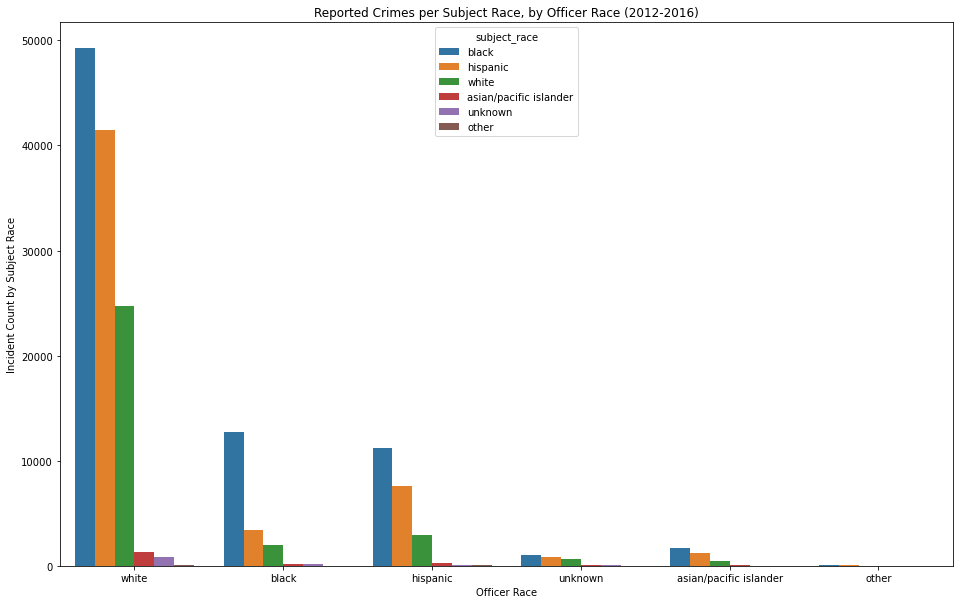

In [18]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x="officer_race", hue="subject_race", data=demo_df)
ax.set(xlabel='Officer Race', ylabel='Incident Count by Subject Race', title="Reported Crimes per Subject Race, by Officer Race (2012-2016)")

plt.savefig("images/Officer_Race_vs_Subject_Race.png")

In [21]:
# plt.figure(figsize=(8,5))
# ax = sns.countplot(x="officer_sex", hue="subject_sex", data=demo_df)
# ax.set(xlabel='Officer Sex', ylabel='Incident Count by Subject Sex', title="Reported Crimes per Subject Sex, by Officer Sex (2012-2016) ")

# plt.savefig("images/Officer_Sex_vs_Subject_Sex.png")

In [23]:
# demo_df

In [137]:
# male_total_incidents = len(demo_df.loc[demo_df['subject_sex'] == 'male'])
# female_total_incidents = len(demo_df.loc[demo_df['subject_sex'] == 'female'])
# total_incidents = male_total_incidents + female_total_incidents

# gender_stats = [{'Total Male Incidents': male_total_incidents, 
#                 'Total Female Incidents': female_total_incidents,
#                 'Total Incidents': total_incidents}]

# gender_stats = pd.DataFrame(gender_stats)
# gender_stats

,Total Male Incidents,Total Female Incidents,Total Incidents
0,124872,39562,164434


In [136]:
white_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'white'])
black_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'black'])
asian_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'asian/pacific islander'])
hispanic_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'hispanic'])
other_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'other'])
unknown_total_subject = len(demo_df.loc[demo_df['subject_race'] == 'unknown'])

white_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'white'])
black_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'black'])
asian_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'asian/pacific islander'])
hispanic_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'hispanic'])
other_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'other'])
unknown_total_officer = len(demo_df.loc[demo_df['officer_race'] == 'unknown'])

white_percent_subject = "{:.2%}".format(white_total_subject / total_incidents)
black_percent_subject = "{:.2%}".format(black_total_subject / total_incidents)
asian_percent_subject = "{:.2%}".format(asian_total_subject / total_incidents)
hispanic_percent_subject = "{:.2%}".format(hispanic_total_subject / total_incidents)
other_percent_subject = "{:.2%}".format(other_total_subject / total_incidents)
unknown_percent_subject = "{:.2%}".format(unknown_total_subject / total_incidents)

white_percent_officer = "{:.2%}".format(white_total_officer / total_incidents)
black_percent_officer = "{:.2%}".format(black_total_officer / total_incidents)
asian_percent_officer = "{:.2%}".format(asian_total_officer / total_incidents)
hispanic_percent_officer = "{:.2%}".format(hispanic_total_officer / total_incidents)
other_percent_officer = "{:.2%}".format(other_total_officer / total_incidents)
unknown_percent_officer = "{:.2%}".format(unknown_total_officer / total_incidents)

total_incidents 

race_stats = [{'Race': 'Subject', 
               'Total White Incidents': white_total_subject, 
               'Total Black Incidents': black_total_subject,
               'Total Asian Incidents': asian_total_subject,
               'Total Hispanic Incidents': hispanic_total_subject,
               'Total Other Incidents': other_total_subject,
               'Total Unknown Incidents': unknown_total_subject},              
             {'Race': 'Officer',
              'Total White Incidents': white_total_officer, 
              'Total Black Incidents': black_total_officer,
              'Total Asian Incidents': asian_total_officer,
              'Total Hispanic Incidents': hispanic_total_officer,
              'Total Other Incidents': other_total_officer,
              'Total Unknown Incidents': unknown_total_officer}]


#                 'Total Incidents': total_incidents},
        
               
race_stats = pd.DataFrame(race_stats).set_index("Race")
race_stats

,Total White Incidents,Total Black Incidents,Total Asian Incidents,Total Hispanic Incidents,Total Other Incidents,Total Unknown Incidents
Race,,,,,,
Subject,30783,76035,1780,54554,143,1139
Officer,117585,18523,3429,22113,122,2662


In [26]:
# subject_race_percents = [{'Race': 'Subject', 
#                'Percent White Incidents': white_percent_subject, 
#                'Percent Black Incidents': black_percent_subject,
#                'Percent Asian Incidents': asian_percent_subject,
#                'Percent Hispanic Incidents': hispanic_percent_subject,
#                'Percent Other Incidents': other_percent_subject,
#                'Percent Unknown Incidents': unknown_percent_subject}]

# subject_race_percents = pd.DataFrame(subject_race_percents).set_index("Race")
# subject_race_percents

,Percent White Incidents,Percent Black Incidents,Percent Asian Incidents,Percent Hispanic Incidents,Percent Other Incidents,Percent Unknown Incidents
Race,,,,,,
Subject,18.72%,46.24%,1.08%,33.18%,0.09%,0.69%


In [27]:
# officer_race_percents = [{'Race': 'Officer',
#               'Percent White Incidents': white_percent_officer, 
#               'Percent Black Incidents': black_percent_officer,
#               'Percent Asian Incidents': asian_percent_officer,
#               'Percent Hispanic Incidents': hispanic_percent_officer,
#               'Percent Other Incidents': other_percent_officer,
#               'Percent Unknown Incidents': unknown_percent_officer}]

# officer_race_percents = pd.DataFrame(officer_race_percents).set_index("Race")
# officer_race_percents

,Percent White Incidents,Percent Black Incidents,Percent Asian Incidents,Percent Hispanic Incidents,Percent Other Incidents,Percent Unknown Incidents
Race,,,,,,
Officer,71.51%,11.26%,2.09%,13.45%,0.07%,1.62%


In [135]:
race_percents = [{'Race': 'Subject', 
               'Percent White Incidents': white_percent_subject, 
               'Percent Black Incidents': black_percent_subject,
               'Percent Asian Incidents': asian_percent_subject,
               'Percent Hispanic Incidents': hispanic_percent_subject,
               'Percent Other Incidents': other_percent_subject,
               'Percent Unknown Incidents': unknown_percent_subject},
                {'Race': 'Officer',
              'Percent White Incidents': white_percent_officer, 
              'Percent Black Incidents': black_percent_officer,
              'Percent Asian Incidents': asian_percent_officer,
              'Percent Hispanic Incidents': hispanic_percent_officer,
              'Percent Other Incidents': other_percent_officer,
              'Percent Unknown Incidents': unknown_percent_officer}]

race_percents = pd.DataFrame(race_percents).set_index("Race")
race_percents


,Percent White Incidents,Percent Black Incidents,Percent Asian Incidents,Percent Hispanic Incidents,Percent Other Incidents,Percent Unknown Incidents
Race,,,,,,
Subject,18.72%,46.24%,1.08%,33.18%,0.09%,0.69%
Officer,71.51%,11.26%,2.09%,13.45%,0.07%,1.62%


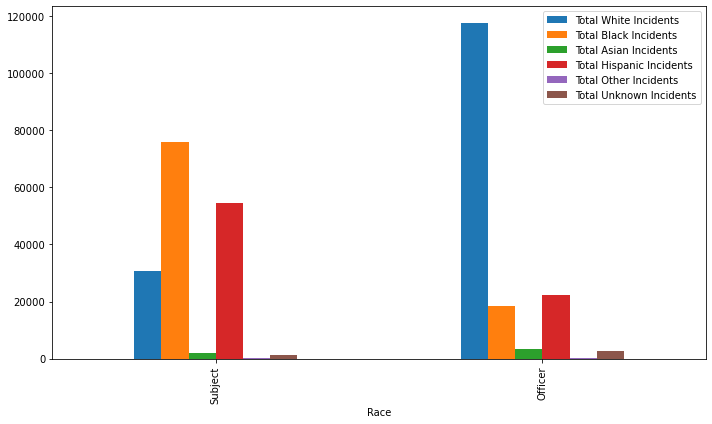

In [28]:
race_chart = race_stats.plot(kind='bar', figsize=(10, 6))

#show bar chart
plt.tight_layout()
plt.savefig("images/Officer_And_Subject_Races.png")
plt.show()

In [35]:
stats.ttest_ind(population_sr, sample_sr, equal_var=False)

Ttest_indResult(statistic=array([4.52051754e-01, 3.57916979e-04, 3.57916979e-04]), pvalue=array([0.66163637, 0.99972146, 0.99972146]))

In [37]:
# demo_df

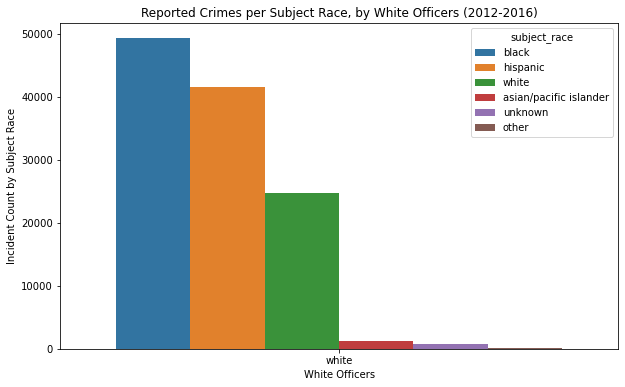

In [138]:
race_df = demo_df[['subject_race', 'officer_race']]

officer_white_df = race_df.loc[race_df['officer_race'] == 'white']

plt.figure(figsize=(10,6))
ax = sns.countplot(x="officer_race", hue="subject_race", data=officer_white_df)
ax.set(xlabel='White Officers', ylabel='Incident Count by Subject Race', title="Reported Crimes per Subject Race, by White Officers (2012-2016)")

plt.savefig("images/Officer_White_vs_Subject_Race.png")

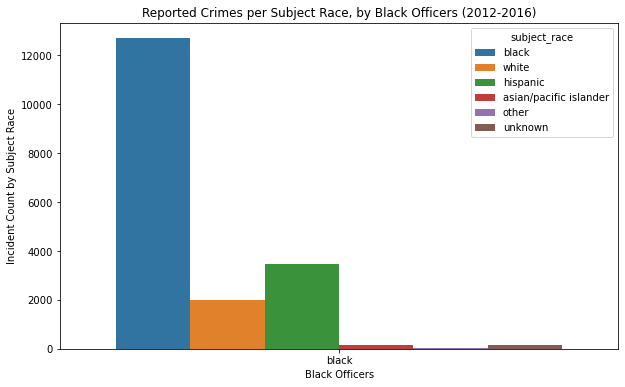

In [139]:
officer_black_df = race_df.loc[race_df['officer_race'] == 'black']

plt.figure(figsize=(10,6))
ax = sns.countplot(x="officer_race", hue="subject_race", data=officer_black_df)
ax.set(xlabel='Black Officers', ylabel='Incident Count by Subject Race', title="Reported Crimes per Subject Race, by Black Officers (2012-2016)")

plt.savefig("images/Officer_Black_vs_Subject_Race.png")